# Presentation of task boundaries on the diagrams

## Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [2]:
def plot_one_task_bounds(task_idx, df_schedule, df_tasks_bounds, df_tasks):
    task_name = df_tasks.at[task_idx,"Name"]
    task_start_day = df_tasks.at[task_idx,"Start day"]
    task_end_day = df_tasks.at[task_idx,"End day"]

    x_task = pd.date_range(start=task_start_day, end=task_end_day, freq="D")
    y_tmp = df_schedule[ df_schedule.iloc[:,0]==task_name ]
    y_task = (y_tmp[x_task.astype("str")]).iloc[0].tolist()

    fig, ax = plt.subplots()
    ax.plot(x_task, y_task, 'o', markeredgewidth=1.5)
    ax.xaxis.set_major_locator(tck.MaxNLocator(5, integer=True))
    ax.xaxis.set_minor_locator(tck.MultipleLocator())
    ax.step(x_task, y_task, linewidth=0.5, where='mid')
    ax.legend(['Task {id}'.format(id=task_name)], loc="upper right")
    ax.yaxis.grid(alpha=0.5)
    ax.set_axisbelow(True)
    ax.yaxis.set_major_locator(tck.MultipleLocator(1))
    ax.set_ylim([-0.2, 8])

    bounds = df_tasks_bounds[ df_tasks_bounds["Task"] == task_name]
    for idx in bounds.index:
        start = bounds.at[idx,"Start day"]
        end = bounds.at[idx,"End day"]
        bound_days = pd.date_range(start=start, end=end, freq="D")
        lower = bounds.at[idx,"Lower bound"].astype(int)
        upper = bounds.at[idx,"Upper bound"].astype(int)
        if lower == upper:
            lower -= 0.5
            upper += 0.5
        ax.fill_between(bound_days, lower, upper, hatch='/', alpha=0.2, color='#90EE90')

    ax.set_xlim([x_task[0], x_task[-1]])
    ax.tick_params(axis='x', labelsize='small')
    fig.set_size_inches(8, 6)
    figure_path = "./output/{name}.png".format(name=task_name)
    plt.savefig(figure_path, bbox_inches="tight", dpi = 100)
    # #plt.close()

In [3]:
def plot_all_task_bounds(df_schedule, df_tasks_bounds, df_tasks):
    for idx in df_tasks.index:
        plot_one_task_bounds(idx, df_schedule, df_tasks_bounds, df_tasks)

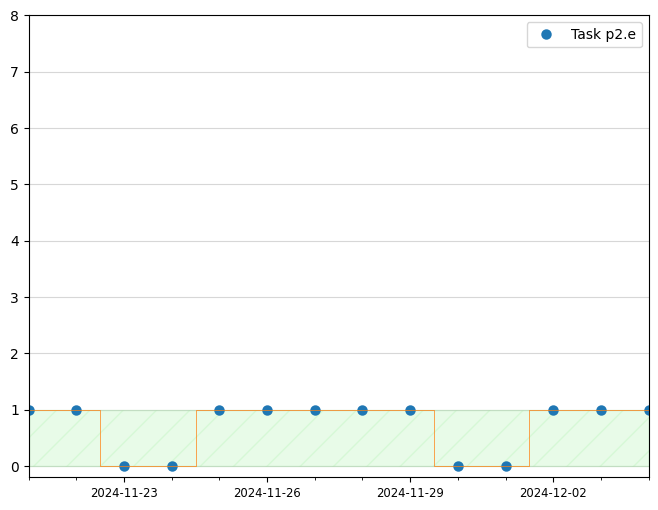

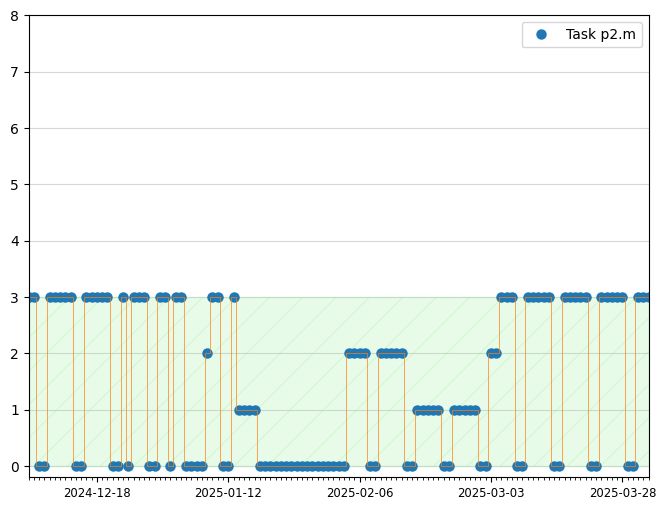

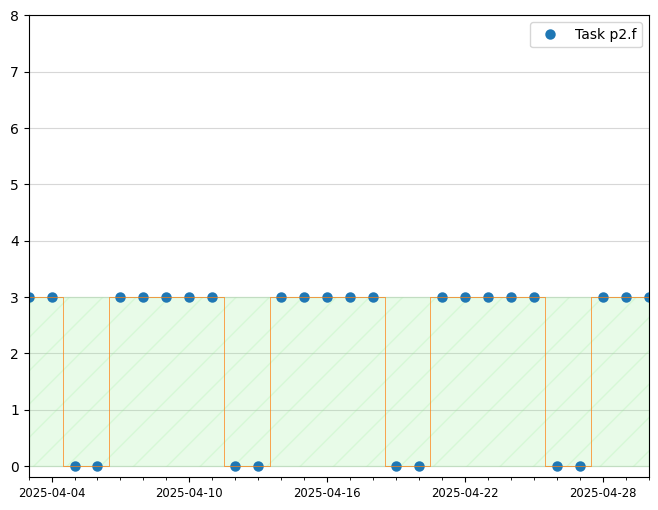

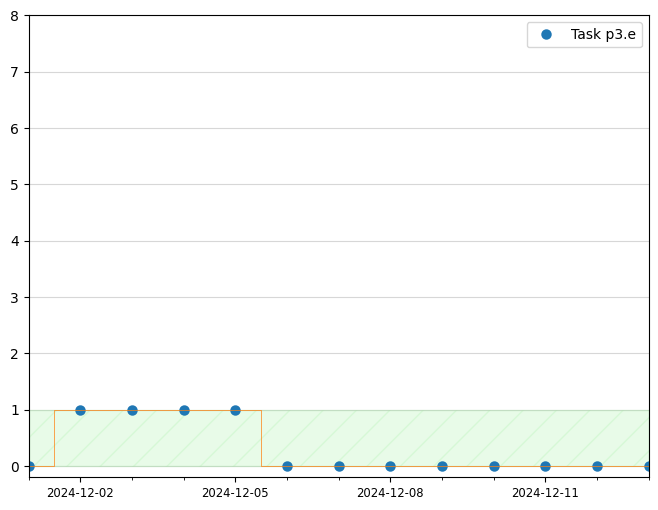

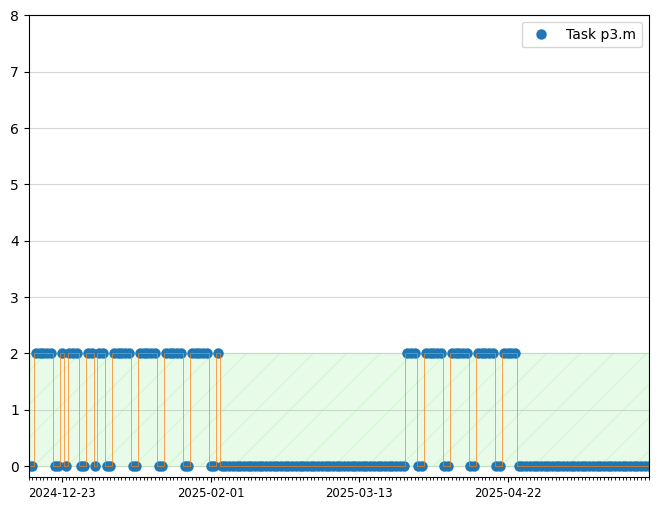

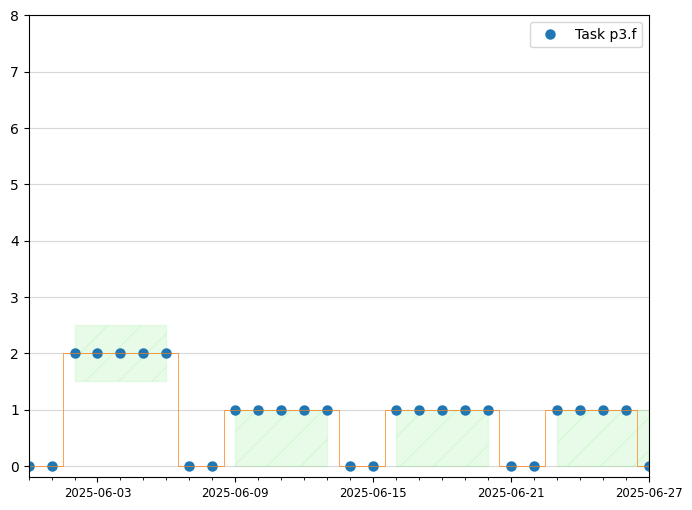

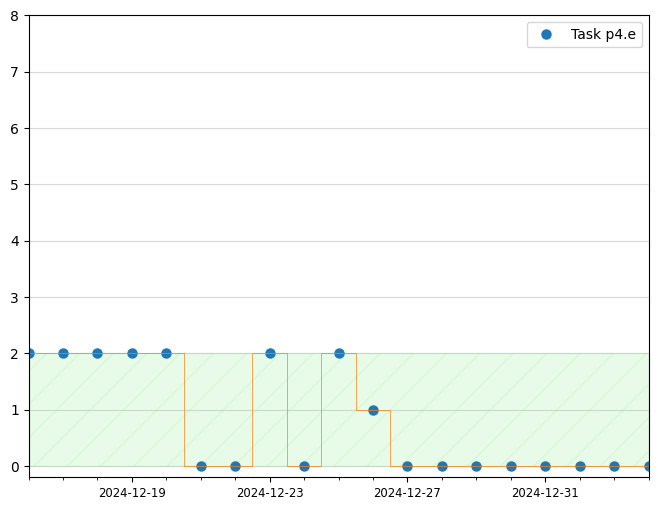

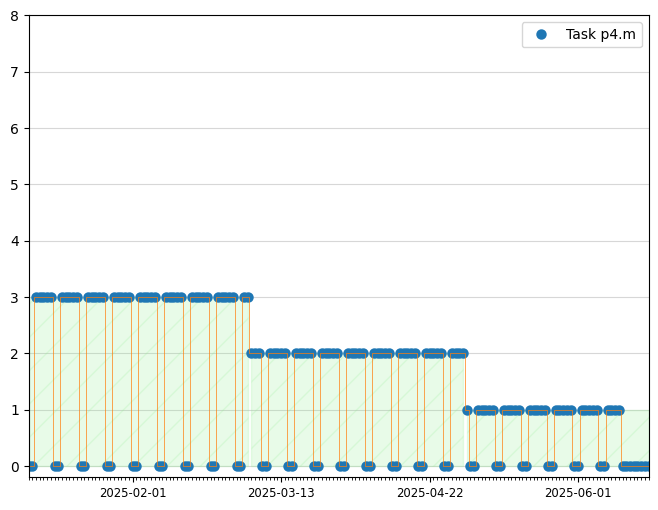

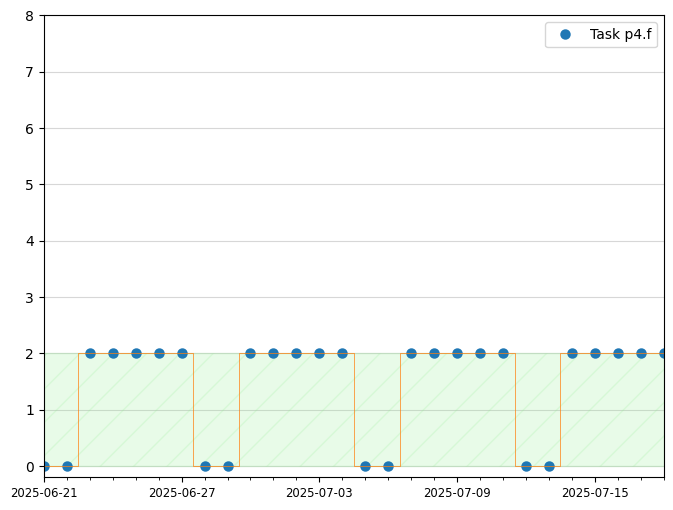

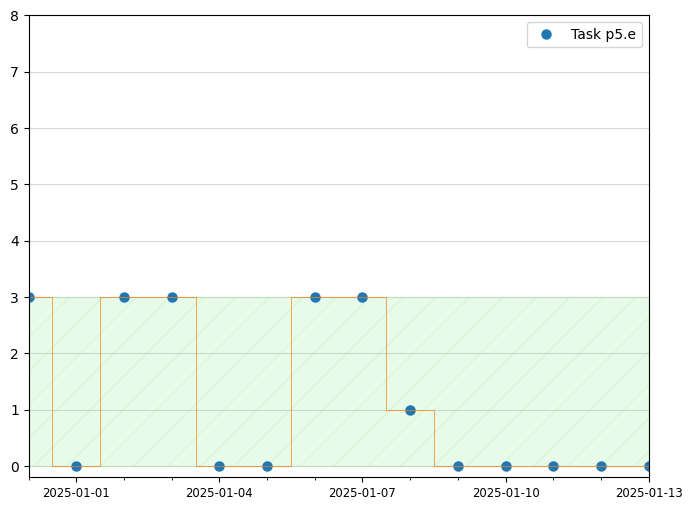

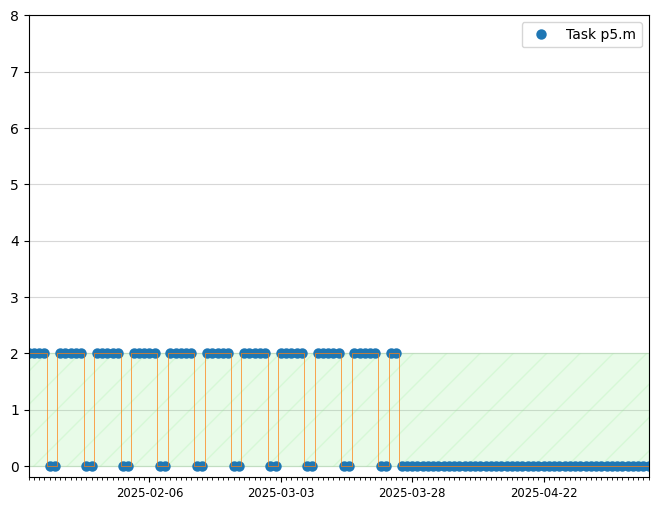

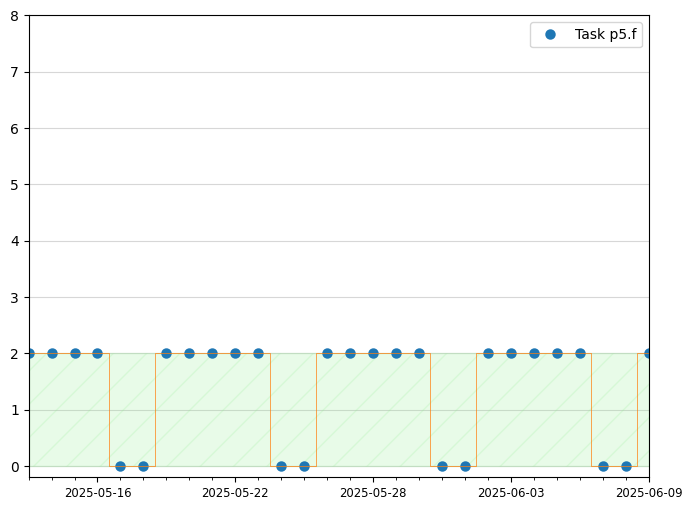

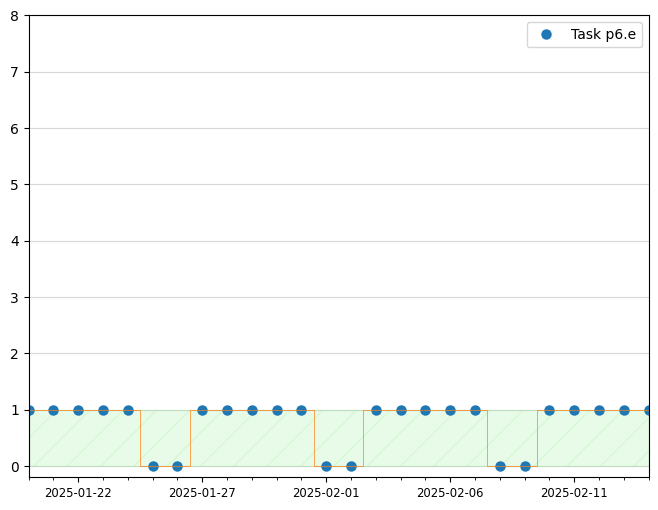

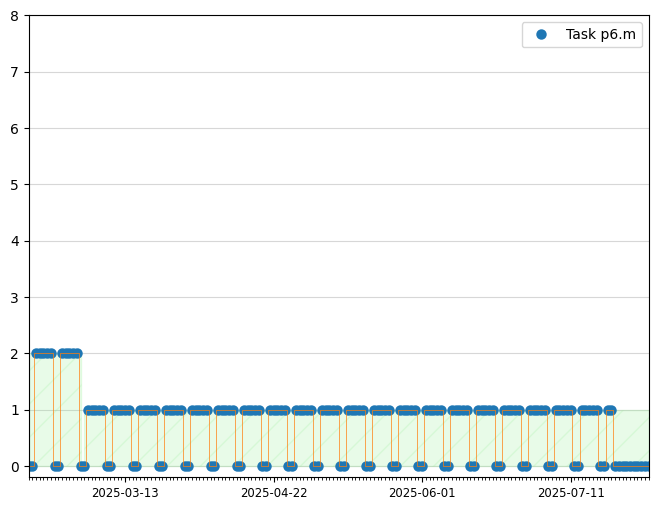

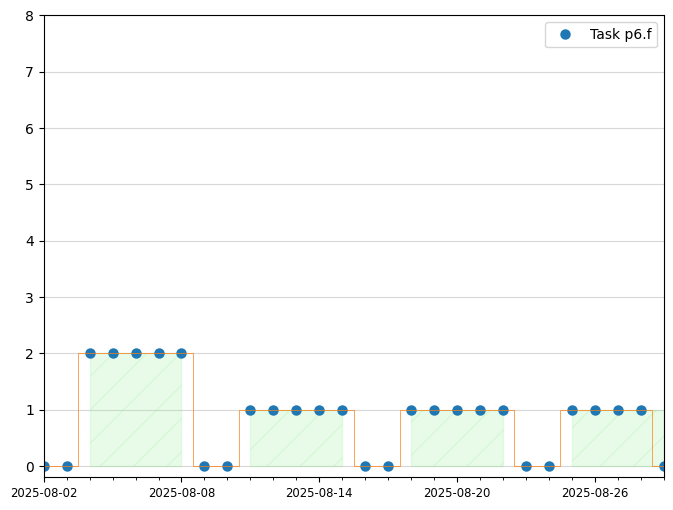

In [4]:
df_schedule = pd.read_csv("./input/schedule.csv")
df_tasks_bounds = pd.read_csv("./input/tasks_bounds.csv")
df_tasks = pd.read_csv("./input/tasks.csv")

plot_all_task_bounds(df_schedule, df_tasks_bounds, df_tasks)